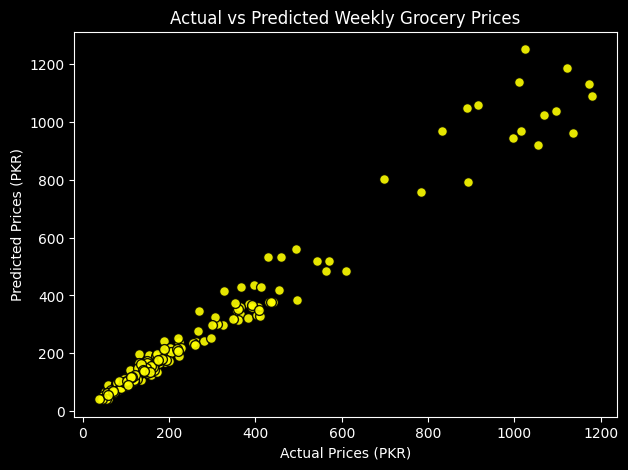

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_csv("weekly_grocery_prices_pakistan.csv")

# Encode categorical columns
df['Item_Encoded'] = LabelEncoder().fit_transform(df['Item'])
df['Season_Encoded'] = LabelEncoder().fit_transform(df['Season'])

# Features and target
X = df[['Item_Encoded', 'Season_Encoded', 'Demand_Index']]
y = df['Weekly_Avg_Price_PKR']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# -------- DARK GRAPH WITH CLEAR DOTS --------
plt.style.use("dark_background")
plt.figure(figsize=(7,5))

plt.scatter(
    y_test,
    y_pred,
    c="yellow",
    alpha=0.9,
    edgecolors="black",
    s=50
)


plt.xlabel("Actual Prices (PKR)")
plt.ylabel("Predicted Prices (PKR)")
plt.title("Actual vs Predicted Weekly Grocery Prices")

plt.show()


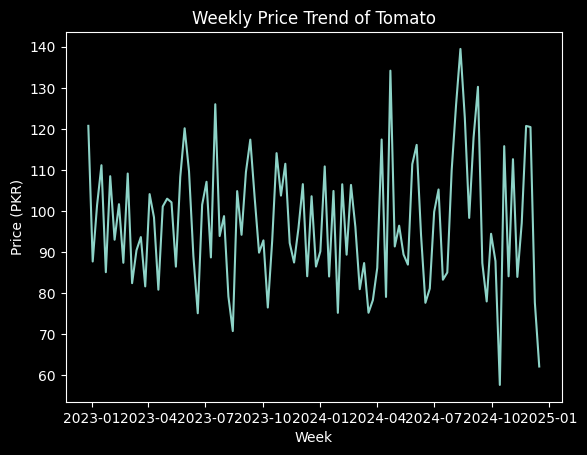

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("weekly_grocery_prices_pakistan.csv")

# Convert week for plotting
df['Week'] = pd.to_datetime(df['Week'] + '-1', format='%Y-%W-%w')

# Select one item
item_df = df[df['Item'] == 'Tomato']

plt.figure()
plt.plot(item_df['Week'], item_df['Weekly_Avg_Price_PKR'])
plt.xlabel("Week")
plt.ylabel("Price (PKR)")
plt.title("Weekly Price Trend of Tomato")
plt.show()
